## House Rent Prediction

### 1. Setting up the dataset repository

Download the dataset from [kaggle](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset), and save in a data directory.

In [ ]:
!mkdir data

In [ ]:
!unzip data/archive.zip -d data/

Archive:  data/archive.zip
  inflating: data/Dataset Glossary.txt  
  inflating: data/House_Rent_Dataset.csv  


In [ ]:
!cat data/Dataset\ Glossary.txt

BHK: Number of Bedrooms, Hall, Kitchen.

Rent: Price of the Houses/Apartments/Flats.

Size: Size of the Houses/Apartments/Flats in Square Feet.

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

Area Locality: Locality of the Houses/Apartments/Flats.

City: City where the Houses/Apartments/Flats are Located.

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

Bathroom: Number of Bathrooms.

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [ ]:
!head -2 data/House_Rent_Dataset.csv

Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner


## 2. EDA

In [ ]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [ ]:
df.shape

(4746, 12)

In [ ]:
df.describe??

In [ ]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


**Plot the boxplot for BHK, Size, Bathroom, and Rent.**

A Box plot is a way to visualize the distribution of the data by using a box and some vertical lines. It is known as the whisker plot. The data can be distributed between five key ranges, which are as follows:

- Minimum: Q1-1.5*IQR
- 1st quartile (Q1): 25th percentile
- Median:50th percentile
- 3rd quartile(Q3):75th percentile
- Maximum: Q3+1.5*IQR
- Here IQR represents the InterQuartile Range which starts from the first quartile (Q1) and ends at the third quartile (Q3).

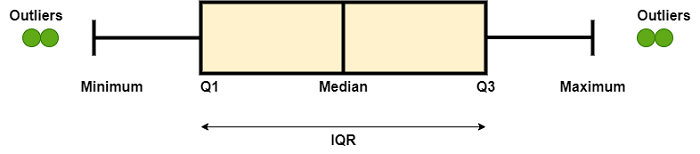

Source: [Boxplot](https://www.javatpoint.com/box-plot-in-python-using-matplotlib)

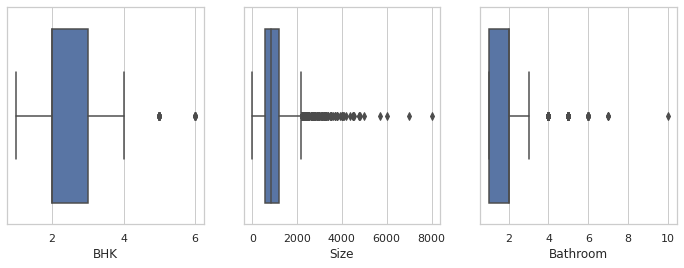

In [ ]:
#@title [Click here to see the solution.]
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["BHK", "Size", "Bathroom"]):
    sns.boxplot(x=df[col], ax=ax[axid])

**Is there a correlation between the size of the apartment and the rent?**

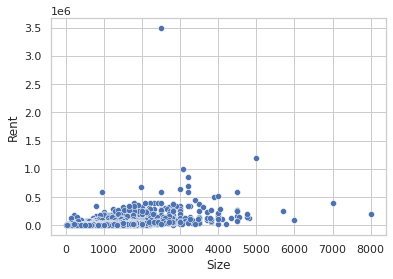

In [ ]:
sns.scatterplot(x=df["Size"], y=df["Rent"])

<Axes: xlabel='BHK', ylabel='Rent'>

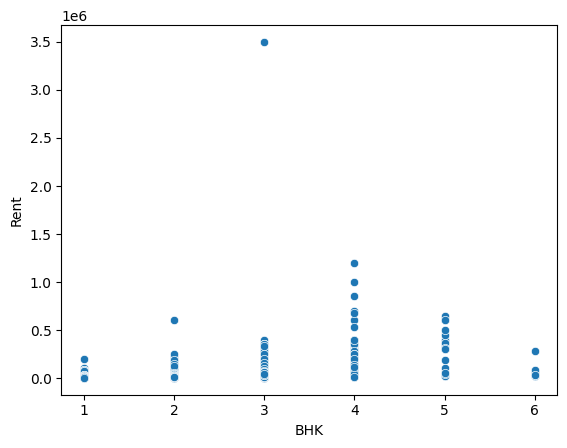

In [ ]:
sns.scatterplot(x=df["BHK"], y=df["Rent"])

**Null Values in the dataset?**

In [ ]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

**What is the distribution of cities in the dataset?**

In [ ]:
city_dist = df["City"].value_counts()
city_dist

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

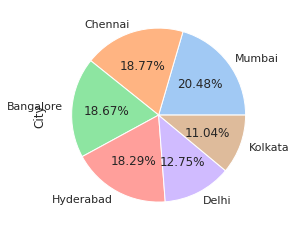

In [ ]:
piec_colors = sns.color_palette('pastel')[0:len(city_dist)]
city_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

ToDo: Plot pie charts for other categorical features.

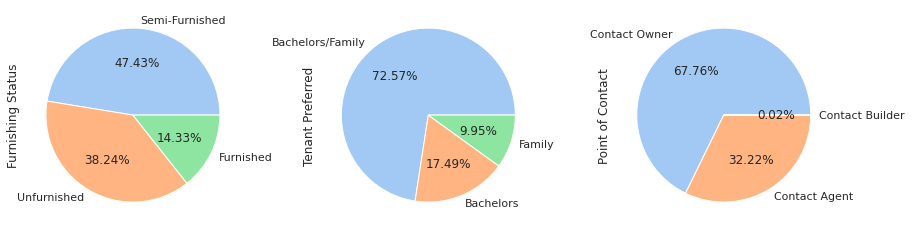

In [ ]:
#@title [Click here to see the solution.]
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for axid, col in enumerate(["Furnishing Status", "Tenant Preferred", "Point of Contact"]):
    col_dist = df[col].value_counts()
    piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
    col_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax=ax[axid])

ToDo: Plot tenant preference in each city.

**Need more graphs?**

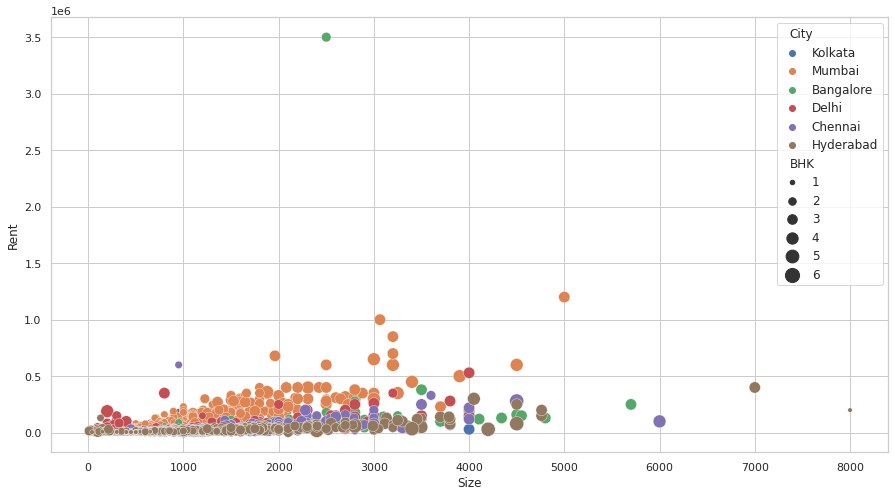

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["Size"], y=df["Rent"], hue=df["City"], size=df["BHK"], sizes=(20, 200), legend="full")

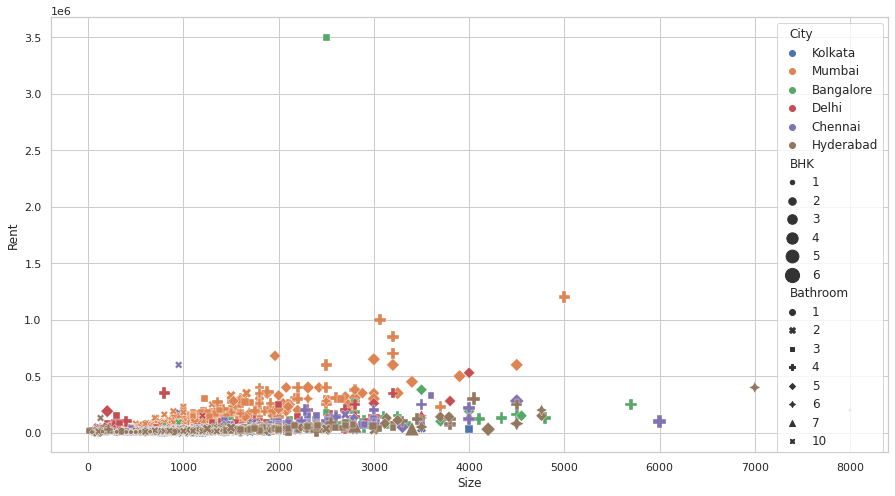

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["Size"], y=df["Rent"], hue=df["City"], size=df["BHK"], style=df["Bathroom"], sizes=(20, 200), legend="full")

The above plot shows that the ....

## 3. Data Transformations

In [ ]:
df.columns

'Posted On' is a date. How can we use date-type features in our model?

Is the target variable related to a seasonal event (e.g.: sale around a festival), then we could take the months as featurre.  
Date of birth are usually used to derive the feature age.  
In this case, we can derive a feature of recency of the post.

In [ ]:
import datetime

In [ ]:
df['Recency'] = df['Posted On'].apply(lambda x: (datetime.datetime.today() - datetime.datetime.strptime(x, '%Y-%m-%d')).days)

In [ ]:
df[['Posted On', 'Recency']]

,Posted On,Recency
0,2022-05-18,92
1,2022-05-13,97
2,2022-05-16,94
3,2022-07-04,45
4,2022-05-09,101
...,...,...
4741,2022-05-18,92
4742,2022-05-15,95
4743,2022-07-10,39
4744,2022-07-06,43


What is Floor Type?

In [ ]:
df['Floor'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

ToDo: Write a basic function to parse the floor and convert it into a numeric feature.

In [ ]:
#@title [Click here to see the solution.]

def parse_floor(x):
    floor_str = x.split(" out of ")[0]
    if floor_str.find("Ground") > -1:
        return 0
    elif floor_str.find("Upper Basement") > -1:
        return -1
    elif floor_str.find("Lower Basement") > -1:
        return -2
    else:
        return int(floor_str)

df['FloorNum'] = df['Floor'].apply(parse_floor)
df[['Floor', 'FloorNum']]

,Floor,FloorNum
0,Ground out of 2,0
1,1 out of 3,1
2,1 out of 3,1
3,1 out of 2,1
4,1 out of 2,1
...,...,...
4741,3 out of 5,3
4742,1 out of 4,1
4743,3 out of 5,3
4744,23 out of 34,23


How do we use City as a feature in the model?

We can use a **categorical variable** to encode the City and Furnishing Status.

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
le.fit(list(df['City']))
df['city_cat'] = df['City'].apply(lambda x: le.transform([x])[0])

In [ ]:
df[['city_cat', 'City']]

,city_cat,City
0,4,Kolkata
1,4,Kolkata
2,4,Kolkata
3,4,Kolkata
4,4,Kolkata
...,...,...
4741,3,Hyderabad
4742,3,Hyderabad
4743,3,Hyderabad
4744,3,Hyderabad


In [ ]:
le_furniture = preprocessing.LabelEncoder()
le_furniture.fit(list(df['Furnishing Status']))
df['furnishing_cat'] = df['Furnishing Status'].apply(lambda x: le_furniture.transform([x])[0])
df[['Furnishing Status', 'furnishing_cat']]

,Furnishing Status,furnishing_cat
0,Unfurnished,2
1,Semi-Furnished,1
2,Semi-Furnished,1
3,Unfurnished,2
4,Unfurnished,2
...,...,...
4741,Semi-Furnished,1
4742,Semi-Furnished,1
4743,Semi-Furnished,1
4744,Semi-Furnished,1


In [ ]:
tenpref_le = preprocessing.LabelEncoder()
tenpref_le.fit(list(df['Tenant Preferred']))
df['tenent_pref_cat'] = df['Tenant Preferred'].apply(lambda x: tenpref_le.transform([x])[0])
df[['Tenant Preferred', 'tenent_pref_cat']]

,Tenant Preferred,tenent_pref_cat
0,Bachelors/Family,1
1,Bachelors/Family,1
2,Bachelors/Family,1
3,Bachelors/Family,1
4,Bachelors,0
...,...,...
4741,Bachelors/Family,1
4742,Bachelors/Family,1
4743,Bachelors/Family,1
4744,Family,2


In [ ]:
areatype_le = preprocessing.LabelEncoder()
areatype_le.fit(list(df['Area Type']))
df['areatype_cat'] = df['Area Type'].apply(lambda x: areatype_le.transform([x])[0])
df[['Area Type', 'areatype_cat']]

,Area Type,areatype_cat
0,Super Area,2
1,Super Area,2
2,Super Area,2
3,Super Area,2
4,Carpet Area,1
...,...,...
4741,Carpet Area,1
4742,Super Area,2
4743,Carpet Area,1
4744,Carpet Area,1


Let us remove the one outlier in the dataset, which has rent 35 Lacs.

In [ ]:
max(df['Rent']), df['Rent'].idxmax()

(3500000, 1837)

In [ ]:
df = df.drop([df.index[1837]])

In [ ]:
df.shape

(4745, 17)

## Let us now split the dataset into train-val-test sets.

In [ ]:
df.head(3)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Recency,city_cat,furnishing_cat,tenent_pref_cat,areatype_cat
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,92,4,2,1,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,97,4,1,1,2
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,94,4,1,1,2


In [ ]:
data_df = df[["BHK", "Size", "FloorNum", "Bathroom", "Recency", "city_cat", "furnishing_cat", "areatype_cat", "tenent_pref_cat"]]
data_df.head()

,BHK,Size,FloorNum,Bathroom,Recency,city_cat,furnishing_cat,areatype_cat,tenent_pref_cat
0,2,1100,0,2,92,4,2,2,1
1,2,800,1,1,97,4,1,2,1
2,2,1000,1,1,94,4,1,2,1
3,2,800,1,1,45,4,2,2,1
4,2,850,1,1,101,4,2,1,0


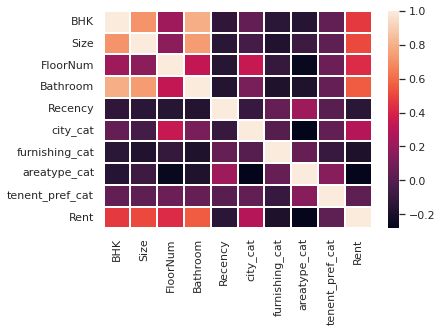

In [ ]:
new_df = df[["BHK", "Size", "FloorNum", "Bathroom", "Recency", "city_cat", "furnishing_cat", "areatype_cat", "tenent_pref_cat", "Rent"]]
sns.heatmap(data=new_df.corr(), lw = 1)

**Data Normalization/Standardization**

Which of the above features should be normalized?

We could normalize the data to range [-1, 1]. Another way to normalize is to subtract mean and divide by standard deviation. In case outliers are present in the dataset, we can also use IQR Robust Scaler Transform.

**ToDo:** https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

**Q:** *Should we standardize the data first and then create train-test splits, or vice-versa?*

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_df, df["Rent"], random_state=42, test_size=0.20)

In [ ]:
X_train

,BHK,Size,FloorNum,Bathroom,Recency,city_cat,furnishing_cat,areatype_cat,tenent_pref_cat
4511,2,800,0,2,98,3,2,2,1
2684,1,500,0,1,111,2,2,2,1
4086,2,1200,1,2,98,3,1,2,1
2441,4,2100,3,4,42,2,1,1,1
4637,1,300,1,1,43,3,2,2,1
...,...,...,...,...,...,...,...,...,...
4427,1,540,1,1,43,3,2,1,0
466,3,1200,3,2,66,4,2,2,1
3093,2,850,0,2,104,1,2,2,1
3773,1,350,0,1,61,1,1,2,1


In [ ]:
y_train

4511     7000
2684    11000
4086    25000
2441    90000
4637     6000
        ...  
4427    14000
466     20000
3093    24000
3773     6000
860     25000
Name: Rent, Length: 3796, dtype: int64

In [ ]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((3796, 9), (949, 9))

In [ ]:
X_train_scaled

array([[-0.10541499, -0.26385815, -0.6095452 , ...,  1.12517127,
         0.9592096 ,  0.14330732],
       [-1.30348473, -0.73171447, -0.6095452 , ...,  1.12517127,
         0.9592096 ,  0.14330732],
       [-0.10541499,  0.35995028, -0.42602413, ..., -0.34865556,
         0.9592096 ,  0.14330732],
       ...,
       [-0.10541499, -0.18588209, -0.6095452 , ...,  1.12517127,
         0.9592096 ,  0.14330732],
       [-1.30348473, -0.96564263, -0.6095452 , ..., -0.34865556,
         0.9592096 ,  0.14330732],
       [-1.30348473, -0.80969052,  0.30806012, ..., -0.34865556,
        -1.04032892, -1.80649411]])

In [ ]:
X_test_scaled

array([[-0.10541499,  0.04804607, -0.6095452 , ..., -0.34865556,
         0.9592096 ,  0.14330732],
       [-1.30348473, -0.57576236, -0.42602413, ...,  1.12517127,
        -1.04032892,  2.09310876],
       [-1.30348473, -0.70832165,  1.59270756, ...,  1.12517127,
        -1.04032892,  0.14330732],
       ...,
       [-0.10541499, -1.3711181 , -0.6095452 , ..., -0.34865556,
         0.9592096 ,  0.14330732],
       [-0.10541499, -0.57576236, -0.24250307, ..., -0.34865556,
         0.9592096 ,  0.14330732],
       [ 1.09265476,  2.82399356,  0.12453906, ..., -0.34865556,
         0.9592096 ,  0.14330732]])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}}
}


In [ ]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_model)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

LinearRegression 42835.100903463725 {}
RandomForestRegressor 24643.827327660292 {'max_depth': 5, 'n_estimators': 35}
[06:21:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 25094.174348151653 {'learning_rate': 0.01, 'n_estimators': 610}
Best model:  XGBRegressor(learning_rate=0.01, n_estimators=610)


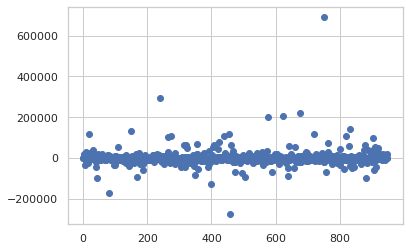

In [ ]:
model_results = eval_models()

In [ ]:
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,42835.100903,48309.040604,22221.350032,23379.269886,{}
RandomForestRegressor,24643.827328,35228.546617,11077.187562,12952.846697,"{'max_depth': 5, 'n_estimators': 35}"
XGBRegressor,25094.174348,35818.583361,10744.585774,12881.007021,"{'learning_rate': 0.01, 'n_estimators': 610}"


*   Can we use Area Locality to determine proximity to hospitals, bus stops, schools, malls, etc.?
*   We discarded the information about total number of floors in the building. How can we use that alongwith the available house's floor number?

